In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Step 1: Prepare Features

#### Load and preprocess

In [3]:
df = pd.read_csv("ticket_price_dist.csv")
df['depart_date'] = pd.to_datetime(df['depart_date'])
df['route'] = df['origin'] + "_" + df['destination']

# Sort to ensure time order
df = df.sort_values(['route', 'depart_date']).reset_index(drop=True)
df

,Unnamed: 0,extract_timestamp,origin,destination,depart_date,best_price,airport_from,airport_to,distance_km,flight_time_hour,extract_date,time,weekday_name,calendar_day,calendar_year,calendar_month,week_number,extraction_period,route
0,30078,2022-12-29 03:13:11.798742,JKTC,BDJ,2023-01-01,1414200.0,CGK,BDJ,946.44,2.02,2022-12-29,03:13:11.798742,Sunday,1,2023,1,52,3 days,JKTC_BDJ
1,30232,2022-12-31 01:49:22.466131,JKTC,BDJ,2023-01-01,1137800.0,CGK,BDJ,946.44,2.02,2022-12-31,01:49:22.466131,Sunday,1,2023,1,52,1 days,JKTC_BDJ
2,30077,2022-12-29 03:13:11.798742,JKTC,BDJ,2023-01-02,1345400.0,CGK,BDJ,946.44,2.02,2022-12-29,03:13:11.798742,Monday,2,2023,1,1,4 days,JKTC_BDJ
3,30235,2022-12-31 01:49:22.466131,JKTC,BDJ,2023-01-02,1206600.0,CGK,BDJ,946.44,2.02,2022-12-31,01:49:22.466131,Monday,2,2023,1,1,2 days,JKTC_BDJ
4,30438,2023-01-02 00:37:44.519977,JKTC,BDJ,2023-01-02,1348099.0,CGK,BDJ,946.44,2.02,2023-01-02,00:37:44.519977,Monday,2,2023,1,1,0 days,JKTC_BDJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45390,10995,2023-02-01 22:44:34.976945,JKTC,YIA,2023-07-29,495660.0,CGK,YIA,455.91,1.33,2023-02-01,22:44:34.976945,Saturday,29,2023,7,30,178 days,JKTC_YIA
45391,10807,2023-02-01 09:17:51.827188,JKTC,YIA,2023-07-30,475660.0,CGK,YIA,455.91,1.33,2023-02-01,09:17:51.827188,Sunday,30,2023,7,30,179 days,JKTC_YIA
45392,10987,2023-02-01 22:44:34.976945,JKTC,YIA,2023-07-30,495660.0,CGK,YIA,455.91,1.33,2023-02-01,22:44:34.976945,Sunday,30,2023,7,30,179 days,JKTC_YIA
45393,10809,2023-02-01 09:17:51.827188,JKTC,YIA,2023-07-31,475660.0,CGK,YIA,455.91,1.33,2023-02-01,09:17:51.827188,Monday,31,2023,7,31,180 days,JKTC_YIA


In [4]:
df["days_until_departure"] = (pd.to_datetime(df["depart_date"]) - pd.to_datetime(df["extract_date"])).dt.days
df

,Unnamed: 0,extract_timestamp,origin,destination,depart_date,best_price,airport_from,airport_to,distance_km,flight_time_hour,extract_date,time,weekday_name,calendar_day,calendar_year,calendar_month,week_number,extraction_period,route,days_until_departure
0,30078,2022-12-29 03:13:11.798742,JKTC,BDJ,2023-01-01,1414200.0,CGK,BDJ,946.44,2.02,2022-12-29,03:13:11.798742,Sunday,1,2023,1,52,3 days,JKTC_BDJ,3
1,30232,2022-12-31 01:49:22.466131,JKTC,BDJ,2023-01-01,1137800.0,CGK,BDJ,946.44,2.02,2022-12-31,01:49:22.466131,Sunday,1,2023,1,52,1 days,JKTC_BDJ,1
2,30077,2022-12-29 03:13:11.798742,JKTC,BDJ,2023-01-02,1345400.0,CGK,BDJ,946.44,2.02,2022-12-29,03:13:11.798742,Monday,2,2023,1,1,4 days,JKTC_BDJ,4
3,30235,2022-12-31 01:49:22.466131,JKTC,BDJ,2023-01-02,1206600.0,CGK,BDJ,946.44,2.02,2022-12-31,01:49:22.466131,Monday,2,2023,1,1,2 days,JKTC_BDJ,2
4,30438,2023-01-02 00:37:44.519977,JKTC,BDJ,2023-01-02,1348099.0,CGK,BDJ,946.44,2.02,2023-01-02,00:37:44.519977,Monday,2,2023,1,1,0 days,JKTC_BDJ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45390,10995,2023-02-01 22:44:34.976945,JKTC,YIA,2023-07-29,495660.0,CGK,YIA,455.91,1.33,2023-02-01,22:44:34.976945,Saturday,29,2023,7,30,178 days,JKTC_YIA,178
45391,10807,2023-02-01 09:17:51.827188,JKTC,YIA,2023-07-30,475660.0,CGK,YIA,455.91,1.33,2023-02-01,09:17:51.827188,Sunday,30,2023,7,30,179 days,JKTC_YIA,179
45392,10987,2023-02-01 22:44:34.976945,JKTC,YIA,2023-07-30,495660.0,CGK,YIA,455.91,1.33,2023-02-01,22:44:34.976945,Sunday,30,2023,7,30,179 days,JKTC_YIA,179
45393,10809,2023-02-01 09:17:51.827188,JKTC,YIA,2023-07-31,475660.0,CGK,YIA,455.91,1.33,2023-02-01,09:17:51.827188,Monday,31,2023,7,31,180 days,JKTC_YIA,180


#### Top Common Routes

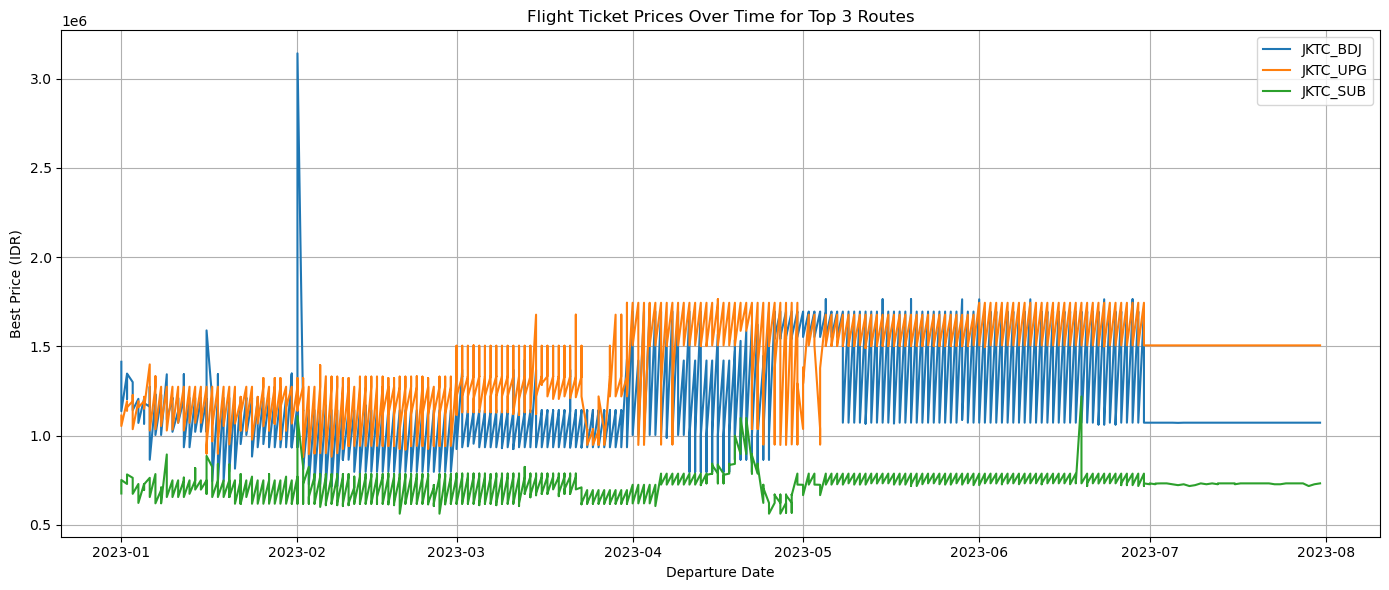

In [5]:
# Find top 3 most common routes
top_routes = df['route'].value_counts().nlargest(3).index.tolist()

# Filter data for these routes
sample_df = df[df['route'].isin(top_routes)]

# Plot price over time for each route
plt.figure(figsize=(14, 6))
for route in top_routes:
    route_data = sample_df[sample_df['route'] == route]
    plt.plot(route_data['depart_date'], route_data['best_price'], label=route)

plt.title("Flight Ticket Prices Over Time for Top 3 Routes")
plt.xlabel("Departure Date")
plt.ylabel("Best Price (IDR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Average price by weekday

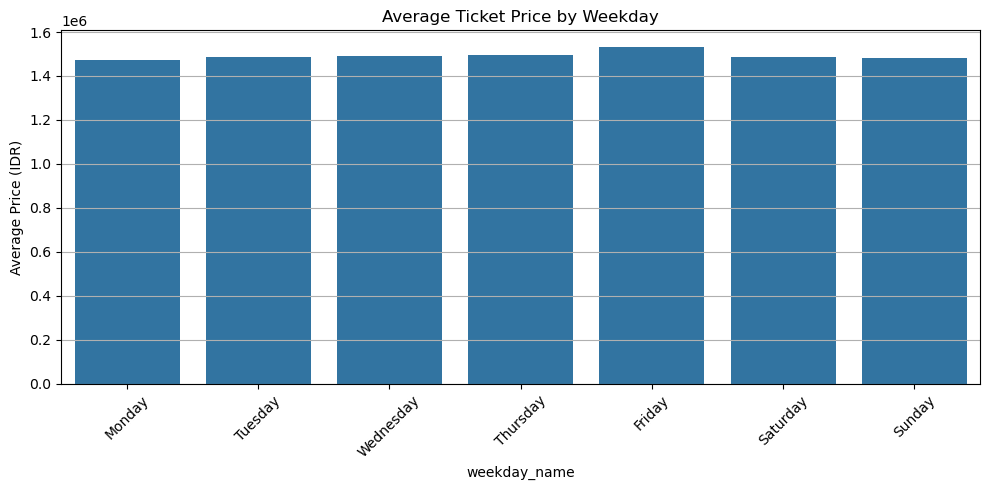

In [6]:
import seaborn as sns

weekday_avg = df.groupby("weekday_name")["best_price"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)
plt.title("Average Ticket Price by Weekday")
plt.ylabel("Average Price (IDR)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#### Top 10 routes by frequency

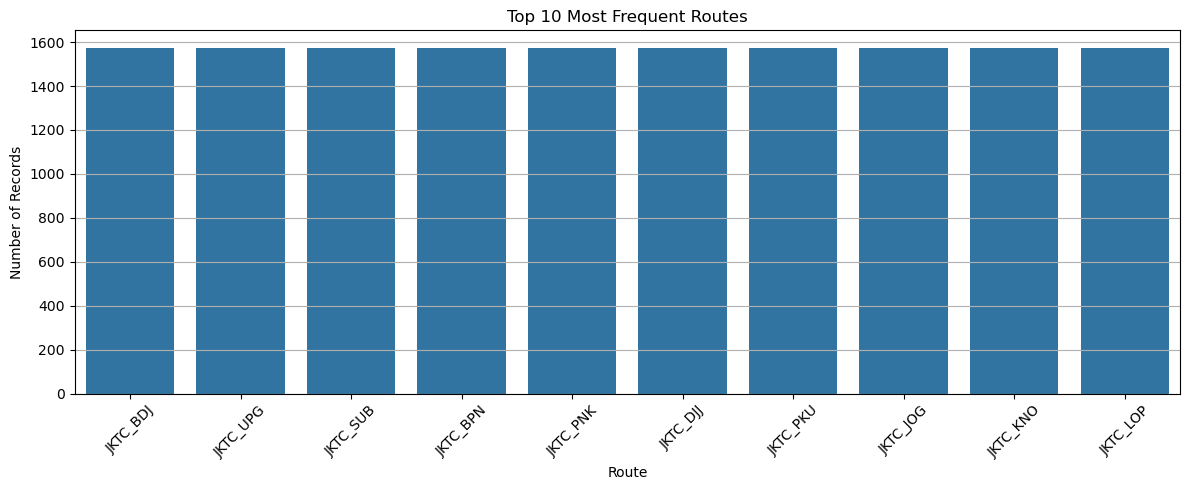

In [7]:
top_routes_freq = df['route'].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_routes_freq.index, y=top_routes_freq.values)
plt.title("Top 10 Most Frequent Routes")
plt.ylabel("Number of Records")
plt.xlabel("Route")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#### Average monthly price trend

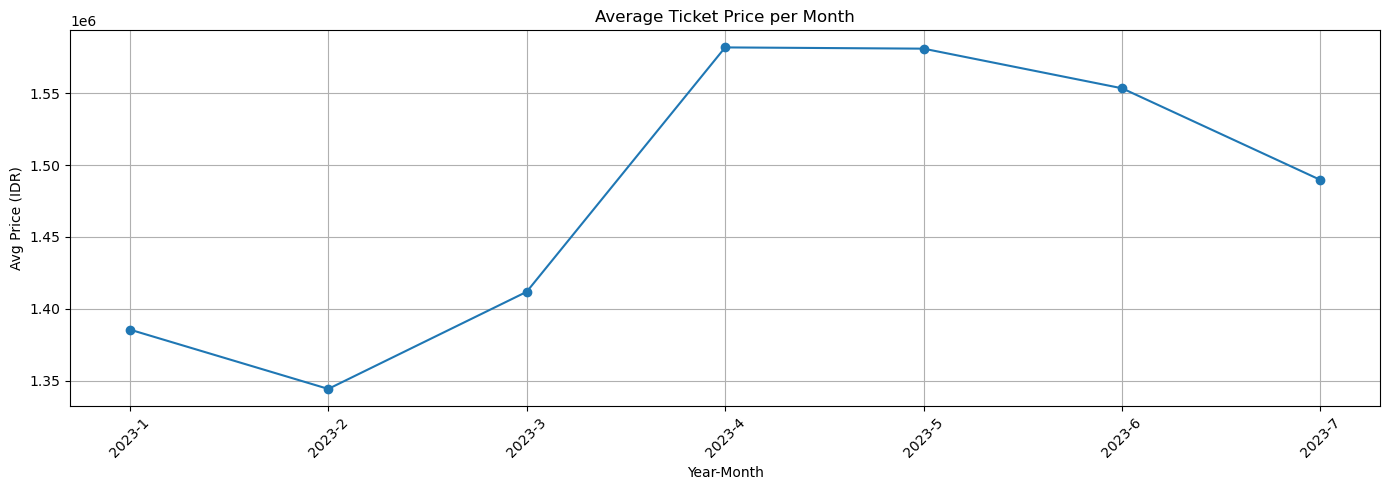

In [8]:
monthly_avg = df.groupby(["calendar_year", "calendar_month"])["best_price"].mean().reset_index()
monthly_avg['year_month'] = monthly_avg['calendar_year'].astype(str) + "-" + monthly_avg['calendar_month'].astype(str)

plt.figure(figsize=(14, 5))
plt.plot(monthly_avg['year_month'], monthly_avg['best_price'], marker='o')
plt.xticks(rotation=45)
plt.title("Average Ticket Price per Month")
plt.xlabel("Year-Month")
plt.ylabel("Avg Price (IDR)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Distance vs Price Correlation

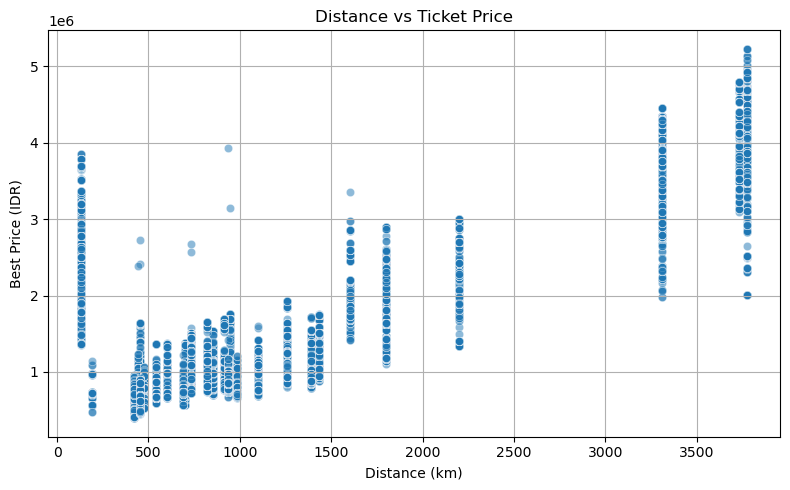

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="distance_km", y="best_price", alpha=0.5)
plt.title("Distance vs Ticket Price")
plt.xlabel("Distance (km)")
plt.ylabel("Best Price (IDR)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Select Columns

In [10]:
features = [
    "calendar_year",
    "calendar_month",
    "week_number",
    "weekday_name",
    "distance_km",
    "flight_time_hour",
    "route",
    "days_until_departure"
]

target = "best_price"

#### Preprocessor

In [11]:
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), [
        'calendar_year',
        'calendar_month',
        'week_number',
        'flight_time_hour',
        'distance_km',
        'days_until_departure'
    ]),
    ("cat", OneHotEncoder(sparse_output=False), ['weekday_name', 'route'])
])
preprocessor

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['calendar_year', 'calendar_month',
                                  'week_number', 'flight_time_hour',
                                  'distance_km', 'days_until_departure']),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 ['weekday_name', 'route'])])

### Step 2: Create multi-step squences

In [12]:
def create_multi_step_sequences_grouped(df, preprocessor, scaler_target, features, target, window_size=14, forecast_horizon=7):
    Xs, ys = [], []
    for _, group in df.groupby("route"):
        if len(group) < window_size + forecast_horizon:
            continue  # skip if not enough data
        X_group = preprocessor.transform(group[features])
        y_group = scaler_target.transform(group[[target]])
        for i in range(len(group) - window_size - forecast_horizon):
            Xs.append(X_group[i:i + window_size])
            ys.append(y_group[i + window_size:i + window_size + forecast_horizon])
    return np.array(Xs), np.array(ys)


### Step 3: Preprocess & Split

In [20]:
# Transform features and target globally
X_all = preprocessor.fit_transform(df[features])
scaler_target = MinMaxScaler()
y_all = scaler_target.fit_transform(df[[target]])

# Generate sequences
WINDOW_SIZE = 60
FORECAST_HORIZON = 30

X_seq, y_seq = create_multi_step_sequences_grouped(df, preprocessor, scaler_target, features, target, WINDOW_SIZE, FORECAST_HORIZON)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

### Step 4: Multi-Step, Multi-Route LSTM

In [21]:
import tensorflow as tf

LSTM = tf.keras.layers.LSTM
Dense = tf.keras.layers.Dense
EarlyStopping = tf.keras.callbacks.EarlyStopping
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
Sequential = tf.keras.models.Sequential
l2 = tf.keras.regularizers.l2
Dropout = tf.keras.layers.Dropout

model = Sequential([
    tf.keras.Input(shape=(WINDOW_SIZE, X_train.shape[2])),
    LSTM(64, kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(FORECAST_HORIZON)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)
    ],
    verbose=1
)

Epoch 1/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0502 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 2/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0068 - val_loss: 0.0049 - learning_rate: 0.0010
Epoch 3/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0055 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 4/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0051 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 5/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0048 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 6/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0048 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 7/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0044 - val_loss: 0.0059 - learning_rate: 5.0000e-04
Epoch 8/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0044 - val_loss: 0.0054 - learning_rate: 5.0000e-04
Epoch 9/100
535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0045 - val_loss: 0.0052 - learni

#### Evaluate MSE loss

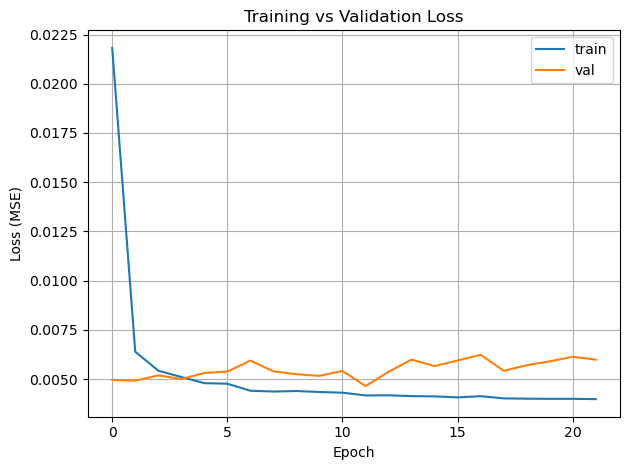

In [22]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 5: Evaluate & Plot

#### Predict and inverse scale

In [23]:
pred = model.predict(X_test)  # shape: (num_samples, forecast_horizon)

if y_test.ndim == 3:
    y_test = y_test.squeeze(-1)  # or use y_test = y_test.reshape(y_test.shape[0], -1)

pred_rescaled = scaler_target.inverse_transform(pred)
y_test_rescaled = scaler_target.inverse_transform(y_test)
print("pred shape:", pred.shape)
print("y_test shape (before):", y_test.shape)

268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
pred shape: (8557, 30)
y_test shape (before): (8557, 30)


#### Plot first 1 prediction window

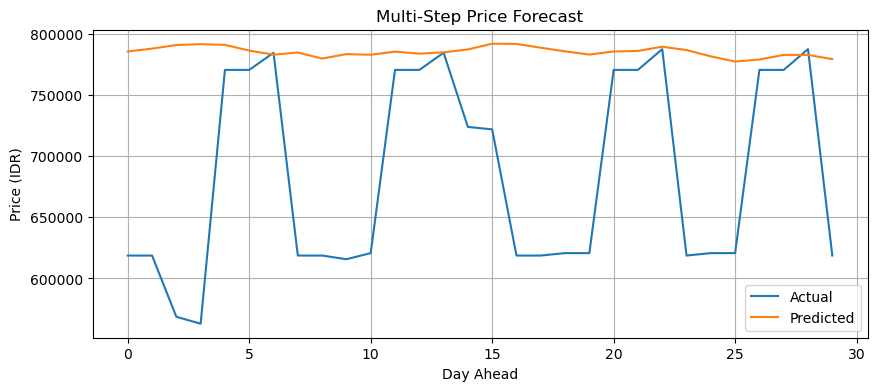

In [24]:
plt.figure(figsize=(10, 4))
plt.plot(y_test_rescaled[0], label='Actual')
plt.plot(pred_rescaled[0], label='Predicted')
plt.title("Multi-Step Price Forecast")
plt.xlabel("Day Ahead")
plt.ylabel("Price (IDR)")
plt.legend()
plt.grid(True)
plt.show()

### Rolling Forecast (Walk-Forward Strategy)

In [25]:
# Use the last window from X_test for rolling forecast
last_input = X_test[-1]  # shape: (WINDOW_SIZE, num_features)
rolling_input = last_input.copy()

# Predict one step at a time, feeding output back in
rolling_preds = []
for _ in range(FORECAST_HORIZON):
    inp = rolling_input.reshape(1, WINDOW_SIZE, -1)
    pred = model.predict(inp)[0][0]  # Get the first predicted value
    rolling_preds.append(pred)
    
    # Append prediction as new "row" with same features (not ideal, simplification)
    # Here you could enhance by updating features like calendar_day, weekday_name etc.
    next_row = rolling_input[-1].copy()
    rolling_input = np.append(rolling_input[1:], [next_row], axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


#### Inverse scale and plot

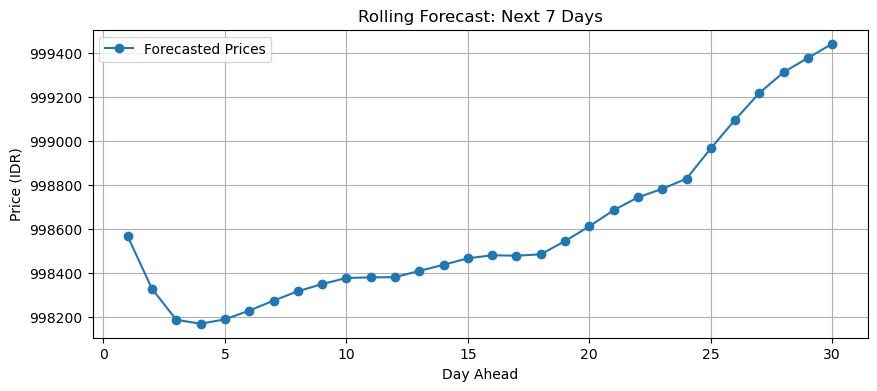

In [26]:
rolling_preds_rescaled = scaler_target.inverse_transform(np.array(rolling_preds).reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(range(1, FORECAST_HORIZON + 1), rolling_preds_rescaled, marker='o', label='Forecasted Prices')
plt.title("Rolling Forecast: Next 7 Days")
plt.xlabel("Day Ahead")
plt.ylabel("Price (IDR)")
plt.legend()
plt.grid(True)
plt.show()